In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import os


#train_test = r'C:\Users\Pantelis\Documents\uni\tede\Second\fulltext\data'
#df_ml = pd.read_csv(march_listings, low_memory=False )

dir_name = 'fulltext\data/'

folder_entries = os.listdir(dir_name)
os.listdir(dir_name)

train_test = pd.DataFrame(columns=['id', 'title', 'content', 'category'])

count = 0
for filename in os.listdir(dir_name):
    if filename == 'README.TXT':
        continue
    else:
        nested_dir = dir_name + filename
        for txt_file in os.listdir(nested_dir):
            count += 1
            open_file = nested_dir + '/' + txt_file
            with open(open_file) as f:
                first_line = f.readline()
                content = ''
                for line in f:
                    content = content + line
            
            train_test = train_test.append({'id': count, 'title': first_line, 'content': content, 'category': filename }, ignore_index=True)

            
train_set, test_set = train_test_split(train_test , test_size=0.2, stratify=train_test['category'])

train_set.to_csv('train_set.tsv', sep = '\t')
Test_Y = test_set['category'] 
del test_set['category']
test_set.to_csv('test_set.tsv', sep = '\t')


sport:


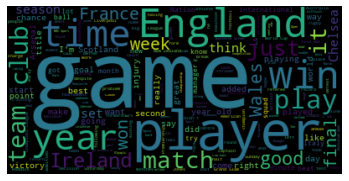

politics:


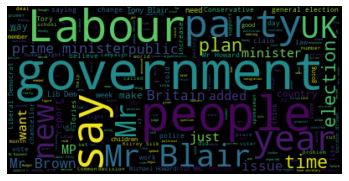

business:


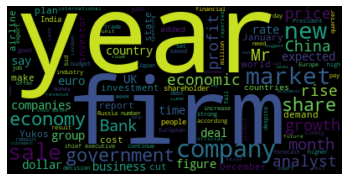

tech:


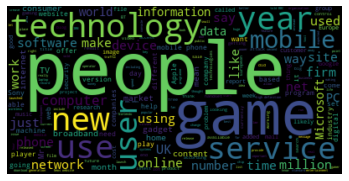

entertainment:


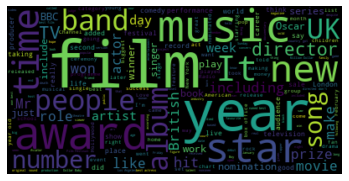

In [36]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

train_path = r'C:\Users\Pantelis\Documents\uni\tede\Second\train_set.tsv'
train_df = pd.read_csv(train_path, sep='\t')

our_words = 'said will'.split()
our_stopwords = ENGLISH_STOP_WORDS.union(our_words)

categories = train_df.category.unique()
for category in categories:
    print(category+':')
    text = ' '.join(train_df[train_df.category == category].content.values)
    wordcloud = WordCloud(stopwords=our_stopwords).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score


Encoder = LabelEncoder() 
Train_Y = Encoder.fit_transform(train_df["category"])
Test_Y = Encoder.fit_transform(Test_Y)


test_path = r'C:\Users\Pantelis\Documents\uni\tede\Second\test_set.tsv'
test_df = pd.read_csv(test_path, sep='\t')

#train_df
tfidf = TfidfVectorizer()
tfs_train = tfidf.fit_transform(train_df['content'])
tfs_test = tfidf.transform(test_df['content'])

count_vectorizer = CountVectorizer()
counts_train = count_vectorizer.fit_transform(train_df['content'])
counts_test = count_vectorizer.transform(test_df['content'])



In [44]:

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=0.1, kernel='linear',gamma=0.001)
SVM.fit(tfs_train,Train_Y)

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10))
print ("Accuracy using SVM with 10 cross validation : {}%".format(round(cv*100,2)))

# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfs_test)

prec_score_test = precision_score(Test_Y, predictions_SVM, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_SVM, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_SVM, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_SVM)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)



Accuracy using SVM with 10 cross validation : 88.15%
0.9282713963963964 0.9146067415730337 0.9146689492910787 0.9146067415730337


In [45]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=0.1, kernel='linear',gamma=0.001)
SVM.fit(counts_train,Train_Y)

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10))
print ("Accuracy using SVM with 10 cross validation : {}%".format(round(cv*100,2)))

# predict the labels on validation dataset
predictions_SVM = SVM.predict(counts_test)

prec_score_test = precision_score(Test_Y, predictions_SVM, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_SVM, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_SVM, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_SVM)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

Accuracy using SVM with 10 cross validation : 96.29%
0.9553394024088268 0.9550561797752809 0.9551381950815201 0.9550561797752809


In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
RF.fit(tfs_train,Train_Y)

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10))
print ("Accuracy using RF with 10 cross validation : {}%".format(round(cv*100,2)))

predictions_RF = RF.predict(tfs_test)

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_RF)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)


Accuracy using RF with 10 cross validation : 95.9%
0.9679777917085276 0.9662921348314607 0.9664433731513782 0.9662921348314607


In [41]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(counts_train,Train_Y)

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10))
print ("Accuracy using RF with 10 cross validation : {}%".format(round(cv*100,2)))

predictions_RF = RF.predict(counts_test)

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_RF)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

Accuracy using RF with 10 cross validation : 95.62%
0.9691011507439954 0.9685393258426966 0.9685398387460974 0.9685393258426966


In [46]:
from sklearn import naive_bayes

Bayes = naive_bayes.MultinomialNB()
Bayes.fit(tfs_train,Train_Y)

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10))
print ("Accuracy using Naive Bayes with 10 cross validation : {}%".format(round(cv*100,2)))

predictions_Bayes = Bayes.predict(tfs_test)

prec_score_test = precision_score(Test_Y, predictions_Bayes, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_Bayes, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_Bayes, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_Bayes)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

Accuracy using Naive Bayes with 10 cross validation : 94.27%
0.952358828065104 0.950561797752809 0.9499519682181409 0.950561797752809


In [47]:


Bayes = naive_bayes.MultinomialNB()
Bayes.fit(counts_train,Train_Y)

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10))
print ("Accuracy using Naive Bayes with 10 cross validation : {}%".format(round(cv*100,2)))

predictions_Bayes = Bayes.predict(counts_test)

prec_score_test = precision_score(Test_Y, predictions_Bayes, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_Bayes, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_Bayes, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_Bayes)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

Accuracy using Naive Bayes with 10 cross validation : 97.25%
0.9713840404594035 0.9707865168539326 0.9708199468090118 0.9707865168539326
